In [2]:
# Importing the necessary Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import confusion_matrix # to create a confusion matrix
# Instead of importing plot_confusion_matrix, import ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay # to draw a confusion matrix

In [3]:
import os
os.getcwd()

'/content'

In [4]:
df = pd.read_csv('insurance_part2_data.csv')
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


we can see there are 3000 rows and 10 columns in the data, this data set is using a memory o f 234.5 KB. All the columns looks good with respect to the data type that it has been associated with, there are no mismatches with respect to the column and the data type of that column

# ***UNIVARIATE ANALYSIS***

In [6]:
df.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


We can draw the following information from using the describe function


1) ***AGE:***  
For the Age variable: IQR = Q3- Q1 = 34
TO see the outlier at an outer extent, we can use Q1-1.5IQR and Q3 + 1.5 IQR, which gives us a values of 20 and 54, but 20 and 54, age seems to be okay, and we do not consider this as an outlier.

we can see that the med age to be 36, so we can deduce that people in the mid 30s are the probable age grouped people who tend to buy insurance


2) ***Commision:***  
For the commision column, we can see the min and 25% values to be 0, this might look like a null value, but, in general we can have 0 comission, hence we can keep the column as it is, without any further treatment.


3) ***Duration:***  
For the Duration column, we have min value as -1, which seems an error in data, we need to identify such records and remove them, also maximum value of 4580 seems illogical and impossible to achieve, so we can remove that particular row as well from the data set for out furhter analysis.

We can also idnetify that the median duration to be 26 days, from this we can deduce the trip to last around a month on an average, we can also use this data to identify the time during which people usually go on vacations to classify better.


4) ***Sales:***  
For the sales column, we see the min value of 0, but in general, if the sales value is 0, it doesn't make sense when a tarvel insurance is claimed in such a case, so we can proceed to delete the rows that has sales values as 0.

**we can see for all the values, mean is greater than median, that indicate that the data in all the columns are right skewed.**

In [7]:
df[(df['Duration']==0) | (df['Duration']==-1) | (df['Duration']==4580) ]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1508,25,JZI,Airlines,No,6.30,Online,-1,18.00,Bronze Plan,ASIA
1746,48,C2B,Airlines,No,0.14,Online,0,0.51,Customised Plan,ASIA
2628,37,C2B,Airlines,No,49.60,Online,0,124.00,Bronze Plan,ASIA
2845,48,C2B,Airlines,No,0.09,Online,4580,0.32,Customised Plan,ASIA


To treat the Duration column

In [8]:
# Drop rows where 'Duration' is 0 or -1
df = df[(df['Duration'] != 0) & (df['Duration'] != -1) & (df['Duration']!=4580)]

Checking if the values

In [9]:
df.describe()

,Age,Commision,Duration,Sales
count,2996.000000,2996.000000,2996.000000,2996.000000
mean,38.089119,14.529866,68.566422,60.282680
std,10.464619,25.487245,105.810811,70.750474
min,8.000000,0.000000,1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,27.000000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,466.000000,539.000000


4 rows are removed and the data looks good now. we can proceed with further EDA

### ***TO further treat the sales column***

In [10]:
# prompt: delete rows from sales column, that has value as 0

# Drop rows where 'Sales' is 0
df = df[df['Sales'] != 0]

Rows with Sales value 0 is deleted, as it doesn't make much sense

In [11]:
df.describe()

,Age,Commision,Duration,Sales
count,2943.000000,2943.000000,2943.000000,2943.000000
mean,38.147808,14.424397,69.091064,61.368301
std,10.497462,25.450966,106.534508,70.916573
min,8.000000,0.000000,1.000000,0.190000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,27.000000,33.000000
75%,42.000000,16.430000,63.000000,69.300000
max,84.000000,210.210000,466.000000,539.000000


Now the data looks good, we can proceed with further analysis

In [12]:
print('The number of rows (observations) is:',df.shape[0],'\n''The number of columns(variables) is:',df.shape[1])

The number of rows (observations) is: 2943 
The number of columns(variables) is: 10


## ***BOXPLOT FOR THE DATA***

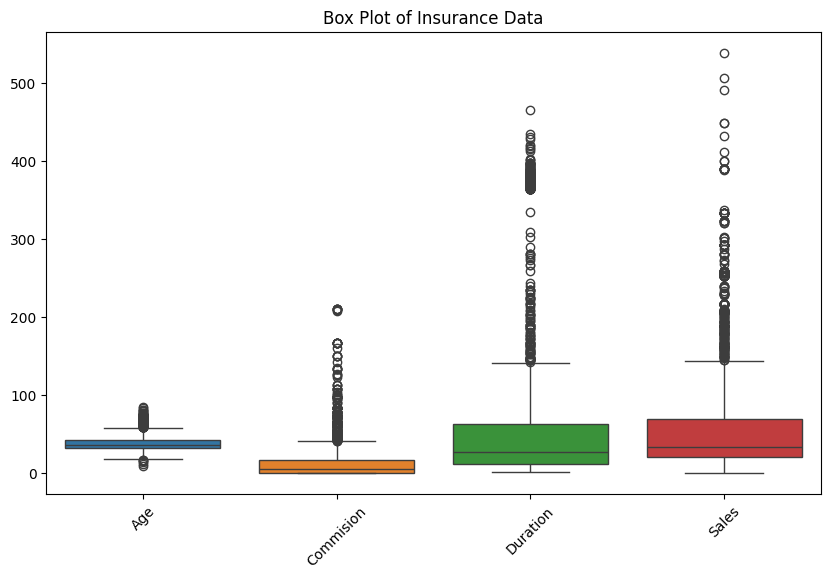

In [13]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box Plot of Insurance Data')
plt.xticks(rotation=45)
plt.show()

from the Box plot we can see that all the numerical columns are right skewed,


we can see the commision median is almost near 0, indicating not every sale leads to a commision.

The duration has a median of around 30, which is also what we can observe from the above initial step.

In all the variables considered, we can see that there are many values that are greater than the 75th percentile value, i.e Q3. BUt by careful observation we can see that, even though they seem like outliers, they are valid values and we need not treat them.

# ***Bi-Variate and Multi-Variate Analysis***

### ***Heatmap to understand the Correlation***

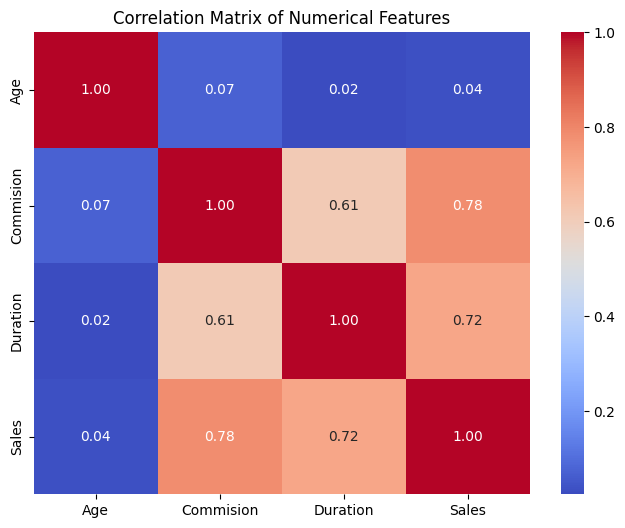

In [94]:
numerical_columns = ['Age', 'Commision', 'Duration', 'Sales']
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()



*   High Correlation value of 0.72 can be observed between duration and sales, which indicates duration and sales are linearly correlated with each other, indicating higher duration leads to higher sales value
*   Sales and commission also has a high correlation value of 0.78, as commission is expressed as a percentage of sales, this behavious is expected.



## **Pairplot Analysis**

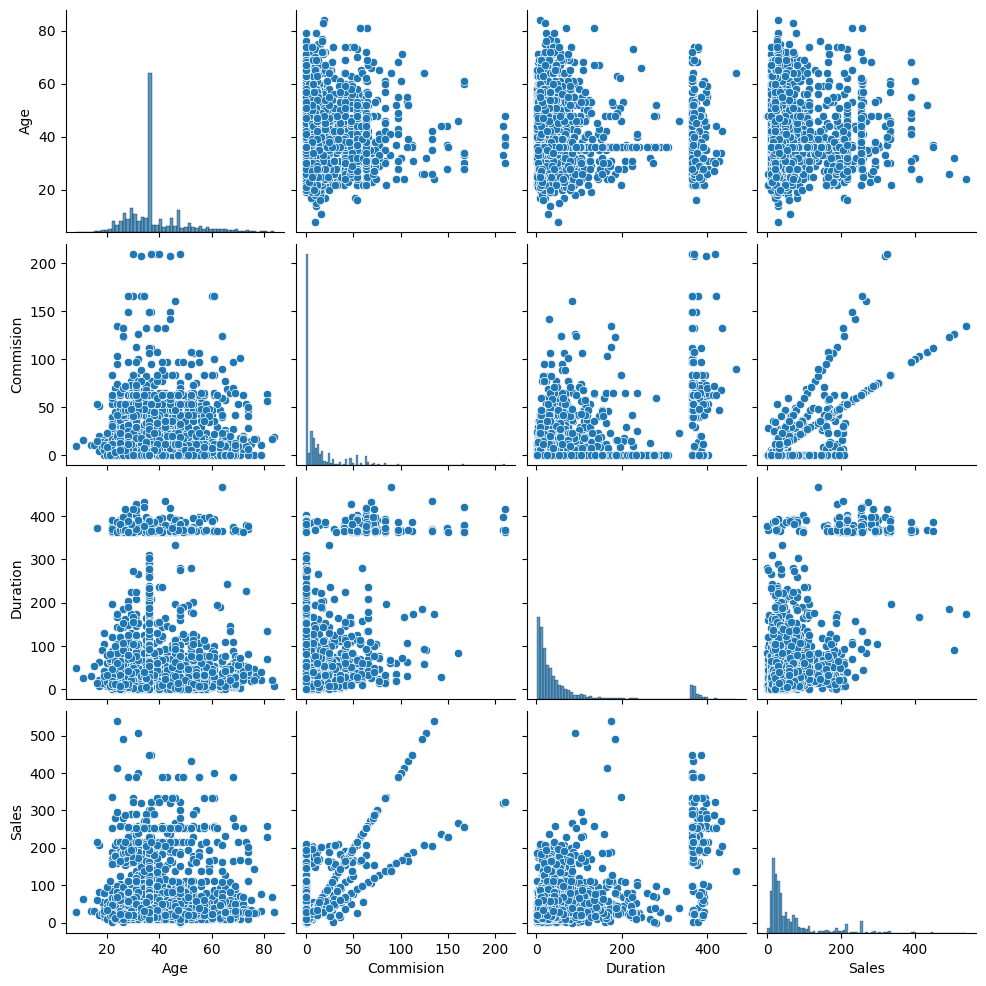

In [14]:
sns.pairplot(df)
plt.show()

***AGE:***
From the Pairplot we can see that, Age doesn't show any visible correlation with any other variable. The distribution is more hapazard and doesnt show any trend.

***Commission:***
Here we can see that commision shows a behaviour which seems to be correlated with sales, which also seems logical, as commision is a variable expressed in terms of percentage of sales

***Duration:***
Here duration doesnt seem to be correlated with any other variable, the plot has a cloud like structrure, so we don't see any correlation. Here, we can observe a presence of multiple classes, which indicates a cluster of short-trips and long-trips



------------------

## **Before splitting the data, the Y variable "CLaimed" has values Yes and No, we need to replace this with 1 and 0 values respectively**

In [15]:
df['Claimed'] = df['Claimed'].replace({'No': 0, 'Yes': 1})

<ipython-input-15-9b229a6c0b64>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Claimed'] = df['Claimed'].replace({'No': 0, 'Yes': 1})


-------------------------------

# **CART BEGINS FROM HERE**

--------------------------------

# ***Prepration for the Data Split for CART***

In [16]:
#We are prepping the data by segregating them into Target and independent variables to runt his model going forward

# Let us define the X(predictor) and Y(target) variables
df_copy= df.copy()

X = df.drop("Claimed" , axis=1)

Y = df.pop("Claimed")
#we have made a copy of the data frame as the 'pop' function removes that particular variable from the data frame and stores
# in another variable

In [17]:
X = pd.get_dummies( X, drop_first = False )
list(X.columns)

['Age',
 'Commision',
 'Duration',
 'Sales',
 'Agency_Code_C2B',
 'Agency_Code_CWT',
 'Agency_Code_EPX',
 'Agency_Code_JZI',
 'Type_Airlines',
 'Type_Travel Agency',
 'Channel_Offline',
 'Channel_Online',
 'Product Name_Bronze Plan',
 'Product Name_Cancellation Plan',
 'Product Name_Customised Plan',
 'Product Name_Gold Plan',
 'Product Name_Silver Plan',
 'Destination_ASIA',
 'Destination_Americas',
 'Destination_EUROPE']

In [18]:
X.head()

,Age,Commision,Duration,Sales,Agency_Code_C2B,Agency_Code_CWT,Agency_Code_EPX,Agency_Code_JZI,Type_Airlines,Type_Travel Agency,Channel_Offline,Channel_Online,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Customised Plan,Product Name_Gold Plan,Product Name_Silver Plan,Destination_ASIA,Destination_Americas,Destination_EUROPE
0,48,0.70,7,2.51,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False
1,36,0.00,34,20.00,False,False,True,False,False,True,False,True,False,False,True,False,False,True,False,False
2,39,5.94,3,9.90,False,True,False,False,False,True,False,True,False,False,True,False,False,False,True,False
3,36,0.00,4,26.00,False,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False
4,33,6.30,53,18.00,False,False,False,True,True,False,False,True,True,False,False,False,False,True,False,False


In [19]:
X.dtypes

,0
Age,int64
Commision,float64
Duration,int64
Sales,float64
Agency_Code_C2B,bool
Agency_Code_CWT,bool
Agency_Code_EPX,bool
Agency_Code_JZI,bool
Type_Airlines,bool
Type_Travel Agency,bool


# ***We finally split the data***

In [20]:
data = df.copy()
data.head()
#Just keepipng the copy of the original dataset.

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,6.30,Online,53,18.00,Bronze Plan,ASIA


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.30, random_state=1)

### **We have splitted the data into 30% and 70%, now we can proceed to build the decision tree**

--------------------

# ***Building the Decision Tree (CART) Model***

In [22]:
from sklearn import tree

In [23]:
dt_model = tree.DecisionTreeClassifier(criterion = 'gini',random_state=1)

here default values of 'min_samples_split' and 'min_samples_leaf' is taken as 2 and 1 respectively.

**Now we build the model on Train data**

In [24]:
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

In [25]:
pd.Series(dt_model.feature_importances_,index=X_train.columns).sort_values(ascending=False)

,0
Duration,0.220134
Agency_Code_C2B,0.209020
Age,0.185914
Sales,0.181959
Commision,0.100862
Product Name_Cancellation Plan,0.019621
Product Name_Bronze Plan,0.013053
Destination_ASIA,0.009425
Product Name_Silver Plan,0.009089
Destination_Americas,0.008668


### **From the GINI index values we can see that, Duration is the most important feature with a value of 0.22, followed by Agency_Code_C2B, Age and So on.**

In [26]:
#Train Data
dt_model.score(X_train,Y_train)

0.9970873786407767

## ***we have got an accuracy of 99%, which clearly shows that the model is completely Overfit, so we need to do careful feature engineering and selection techniques to rectify this***

In [27]:
#Test Data
dt_model.score(X_test,Y_test)

0.7157417893544734

### ***As the model is overfit, it has performed average on the Test data***

# ***To rectify the Overfitting, we use Pruning Technique***

In [28]:
reg_dt_model = tree.DecisionTreeClassifier(criterion = 'gini',
                                       max_depth=13,#upto this depth is where the tree has grown uniformly
                                      min_samples_leaf=9, #ensures that every terminal node (leaf node) have at least 10
                                      #observations in it
                                      min_samples_split=27) #for every node to be split into two child nodes that particular
                                      #node should have at least 30 observations

In [29]:
reg_dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=13, min_samples_leaf=9, min_samples_split=27)

In [30]:
#We are only predicting the classes over here. Python by default takes the 0.5 cutoff of the probability values while
#predicting the classes

Y_train_predict_class = reg_dt_model.predict(X_train)
Y_test_predict_class = reg_dt_model.predict(X_test)

In [31]:
#Here, we are predicting the probabilities and we can manually input a cutoff value which is different than 0.5.

Y_train_predict_prob = reg_dt_model.predict_proba(X_train)
Y_test_predict_prob = reg_dt_model.predict_proba(X_test)

## **Evaluation of the Train and Test Models for the CART**

In [32]:
from sklearn import metrics

In [33]:
print(metrics.confusion_matrix(Y_train,Y_train_predict_class))

[[1250  145]
 [ 226  439]]


In [34]:
tn, fp, fn, tp = metrics.confusion_matrix(Y_train,Y_train_predict_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 1250 
False Positives: 145 
False Negatives: 226 
True Positives: 439


In [35]:
print(metrics.classification_report(Y_train,Y_train_predict_class))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1395
           1       0.75      0.66      0.70       665

    accuracy                           0.82      2060
   macro avg       0.80      0.78      0.79      2060
weighted avg       0.82      0.82      0.82      2060



## ***This model has an accuracy of 82%, this has solved the problem of Overfitting***

## **ROC CURVE FOR THE TRAIN DATA**

AUC: 0.894


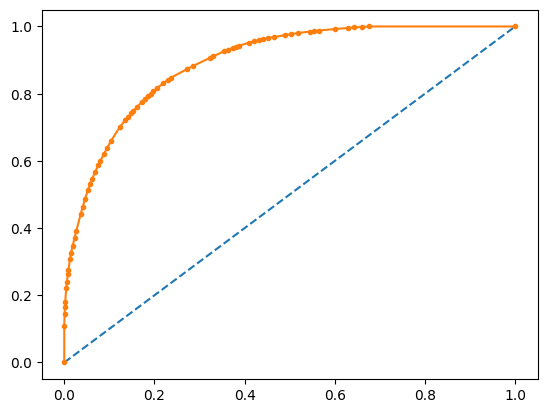

In [36]:
# AUC and ROC for the training data


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Y_train,Y_train_predict_prob[:, 1])#keeping only the probabilities for the desired class outcome
print('AUC: %.3f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,Y_train_predict_prob[:, 1])#keeping only the probabilities for the desired
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### ***THE AUC curve shows a value of 89%, which indicates that the model has a probability of 89% in prediciting the correct class for the positive and negative class values. Hence this is a sign of a good model***

## ***To verify the model performance on the Test Data***

In [37]:
print(metrics.confusion_matrix(Y_test,Y_test_predict_class),'\n')
tn, fp, fn, tp = metrics.confusion_matrix(Y_test,Y_test_predict_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

[[521 103]
 [119 140]] 

True Negative: 521 
False Positives: 103 
False Negatives: 119 
True Positives: 140


In [38]:
print(metrics.classification_report(Y_test,Y_test_predict_class))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       624
           1       0.58      0.54      0.56       259

    accuracy                           0.75       883
   macro avg       0.70      0.69      0.69       883
weighted avg       0.74      0.75      0.75       883



## **ROC CURVE FOR THE TEST DATA**

AUC: 0.767


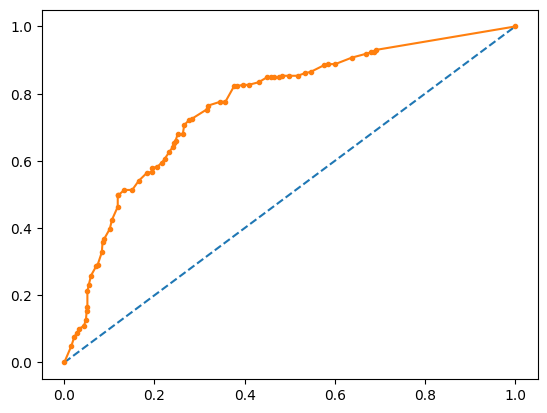

In [39]:
# AUC and ROC for the training data

# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Y_test,Y_test_predict_prob[:, 1])
print('AUC: %.3f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,Y_test_predict_prob[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### ***THE AUC curve shows a value of 77%, which indicates that the model has a probability of 77% in prediciting the correct class for the positive and negative class values. Hence this is a decent model in predicting the classes, and predcting the classes for the Claimed variable.***

-----------------------------------

# **CART ENDS HERE**

------------------------

# **Random Forest Begins Here**

In [42]:
data_bkp= df_copy.copy()
data_bkp.head()
#Just keepipng the copy of the original dataset..copy()
df1=df_copy.copy()

In [43]:
# Let us define the X(predictor) and Y(target) variables

X1 = df1.drop("Claimed" , axis=1)

Y1 = df1.pop("Claimed")
#we have made a copy of the data frame as the 'pop' function removes that particular variable from the data frame and stores
# in another variable

In [44]:
X1 = pd.get_dummies( X, drop_first = False )

In [45]:
list(X1.columns)

['Age',
 'Commision',
 'Duration',
 'Sales',
 'Agency_Code_C2B',
 'Agency_Code_CWT',
 'Agency_Code_EPX',
 'Agency_Code_JZI',
 'Type_Airlines',
 'Type_Travel Agency',
 'Channel_Offline',
 'Channel_Online',
 'Product Name_Bronze Plan',
 'Product Name_Cancellation Plan',
 'Product Name_Customised Plan',
 'Product Name_Gold Plan',
 'Product Name_Silver Plan',
 'Destination_ASIA',
 'Destination_Americas',
 'Destination_EUROPE']

In [47]:
X1.head()

,Age,Commision,Duration,Sales,Agency_Code_C2B,Agency_Code_CWT,Agency_Code_EPX,Agency_Code_JZI,Type_Airlines,Type_Travel Agency,Channel_Offline,Channel_Online,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Customised Plan,Product Name_Gold Plan,Product Name_Silver Plan,Destination_ASIA,Destination_Americas,Destination_EUROPE
0,48,0.70,7,2.51,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False
1,36,0.00,34,20.00,False,False,True,False,False,True,False,True,False,False,True,False,False,True,False,False
2,39,5.94,3,9.90,False,True,False,False,False,True,False,True,False,False,True,False,False,False,True,False
3,36,0.00,4,26.00,False,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False
4,33,6.30,53,18.00,False,False,False,True,True,False,False,True,True,False,False,False,False,True,False,False


## ***Split the data into Train and Test for Random Forest***

In [48]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=.30, random_state=1)

## **We Finally Build the Model**

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfcl = RandomForestClassifier(criterion='gini',
                              random_state=1,
                              oob_score=True,
                              max_features=4,
                              n_estimators=501)

In [51]:
rfcl.fit(X1_train,Y1_train)

RandomForestClassifier(max_features=4, n_estimators=501, oob_score=True,
                       random_state=1)

In [52]:
(rfcl.oob_score_)

0.762621359223301

In [53]:
(1 - rfcl.oob_score_)*100

23.7378640776699

An error rate of 23% indicates that the model has misclassified 23% of the values

In [54]:
pd.Series(rfcl.feature_importances_,index=X1_train.columns).sort_values(ascending=False)

,0
Duration,0.249504
Sales,0.195626
Age,0.172971
Commision,0.121403
Agency_Code_C2B,0.075278
Product Name_Silver Plan,0.033515
Type_Travel Agency,0.021483
Type_Airlines,0.020380
Agency_Code_EPX,0.018561
Product Name_Customised Plan,0.017899


### **from this we can see that the most important variable is duration, followed by sales and age in the list that we have got above**

## **Now we test the model on train and test data to validate the build of the model**

In [55]:
rfcl.score(X1_train,Y1_train)

0.9970873786407767

## **We see that the model is overfit with an accuract of 99.7%, so we need to rectify that before finalising the model, and since this is overfit, we can expect subpar accuracy on the test data as well**

In [56]:
rfcl.score(X1_test,Y1_test)

0.7315968289920725

## **As expected, even though the model performance is not too poor, it is not upto the mark, with an accuracy of 73%**

## **We regularized the Decision Tree by looking at a largely overgrown tree. Here, in the case of Random Forest it is not possible to look at every tree and then go ahead and prune the trees. To make this job simpler we are going to use a command called GridSearchCV.**

--------------------

# ***Grid Search for Random Forest***

In [57]:
from sklearn.model_selection import GridSearchCV

In [76]:
param_grid = {
    'max_depth': [5,10,15],
    'max_features': [2,4],
    'min_samples_leaf': [10,100],
    'min_samples_split': [10,50,200],
    'n_estimators': [101,301,501]
}

In [77]:
rfcl = RandomForestClassifier(random_state=1)

In [78]:
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10,n_jobs=-1)
#n_jobs=-1 allows paralle processing instead of serial processing

### **We pass the variables that we defined above in the param_grid to our random forest classifier to optimise the model and solve the issue of overfitting**

### **we perform the grid search below**

In [79]:
#Takes 15 mins to run this.
#This line of code takes time as it runs multiple combinations of models as specified in the gridsearch parameters
grid_search.fit(X1_train, Y1_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15], 'max_features': [2, 4],
                         'min_samples_leaf': [10, 100],
                         'min_samples_split': [10, 50, 200],
                         'n_estimators': [101, 301, 501]})

In [80]:
#Would like to see which combination gave us the best fit of all
grid_search.best_params_

{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 501}

In [81]:
#This function applies the best parameters found by Gridsearch
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, max_features=4, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=501, random_state=1)

In [82]:
best_model = grid_search.best_estimator_

### **Now that we have identified the best parameters for our model using the Grid Search method, we can proceed to validate the model on the train Data and the Test data**

In [83]:
#This code snippet for predicting the classes.

y1_train_predict = best_model.predict(X1_train)
y1_test_predict = best_model.predict(X1_test)

In [84]:
y1_train_predict_prob = best_model.predict_proba(X1_train)
y1_test_predict_prob = best_model.predict_proba(X1_test)

## **Evaluating the Model on Test and Train Data**

In [85]:
from sklearn import metrics

## ***Train Data Evaluation***

In [86]:
print(metrics.confusion_matrix(Y1_train,y1_train_predict))

[[1235  160]
 [ 242  423]]


In [87]:
tn, fp, fn, tp = metrics.confusion_matrix(Y1_train,y1_train_predict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 1235 
False Positives: 160 
False Negatives: 242 
True Positives: 423


In [88]:
print(metrics.classification_report(Y1_train,y1_train_predict))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1395
           1       0.73      0.64      0.68       665

    accuracy                           0.80      2060
   macro avg       0.78      0.76      0.77      2060
weighted avg       0.80      0.80      0.80      2060



### ***The Train Data gave out an Accuracy of 80%, indicating that the issue of overfitting is now resolved with the help of the Grid search that we used to identify the best parameters. 80% is an above par value and this seems like a good model for the Train data.***



AUC: 0.869


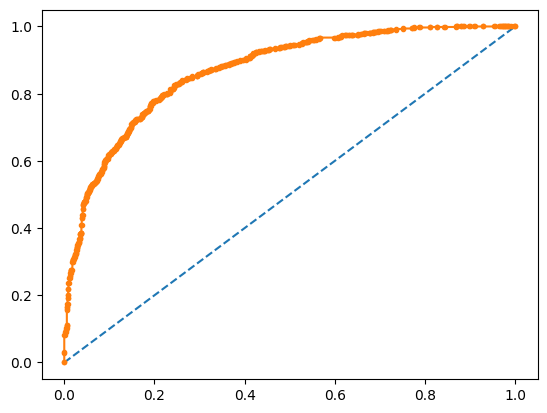

In [89]:
# AUC and ROC for the training data


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Y1_train,y1_train_predict_prob[:, 1])#keeping only the probabilities for the desired class outcome
print('AUC: %.3f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Y1_train,y1_train_predict_prob[:, 1])#keeping only the probabilities for the desired
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### ***From the ROC cure we see that the value we have got is 86.9%, which indicates that the model has a 86.9% chance of correctly distinguishing between the positive class (Claimed = 1) and the negative class (Claimed =0), so this is an indicator of a good model.***

## **Let us Now, Validate the Model for the Test Data**

In [90]:
print(metrics.confusion_matrix(Y1_test,y1_test_predict),'\n')
tn, fp, fn, tp = metrics.confusion_matrix(Y1_test,y1_test_predict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')
print(metrics.classification_report(Y1_test,y1_test_predict))

[[534  90]
 [119 140]] 

True Negative: 534 
False Positives: 90 
False Negatives: 119 
True Positives: 140 

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       624
           1       0.61      0.54      0.57       259

    accuracy                           0.76       883
   macro avg       0.71      0.70      0.70       883
weighted avg       0.76      0.76      0.76       883



### ***The Model has an accuracy of 76% on the Test Data, which is an Above Par Model which is doing a decent job. The Model is doing a really job in predicting the Class 0 problems i.e (Claimed=0) which is indicated by the Specificity of 86% , but does a poor job on the Class 1 problem i.e (Claimed =1 ) which is indicated by a sensitivity of 54%.***

AUC: 0.800


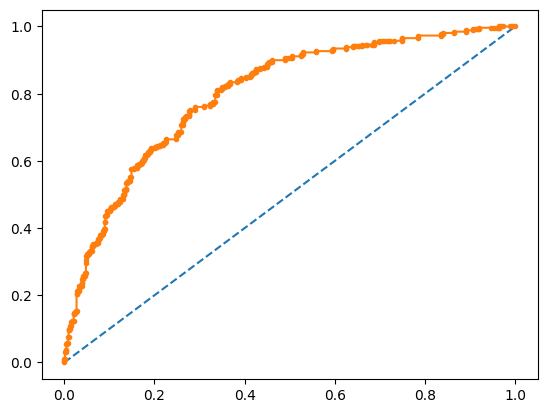

In [91]:
# AUC and ROC for the training data


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Y1_test,y1_test_predict_prob[:, 1])#keeping only the probabilities for the desired class outcome
print('AUC: %.3f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Y1_test,y1_test_predict_prob[:, 1])#keeping only the probabilities for the desired
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### ***Here we can observe that the, AUC value is 80%, which indicates that the model has a 80% chance of correctly distinguishing between the positive class (Claimed = 1) and the negative class (Claimed =0), so this is an indicator of a good model***

----------


# **END**

--------